<b> In this notebook, i start trying to do some general tabulations of the south pacific like, how many events are there in the whole region? I also graph them using time-series to try to see if there is any strange anomalies. I also made a query where china is actor1 and Guam is the action location and graphed all the number of mentions from 2015 to 2020 for each month. </b>


In [1]:
import numpy as np
import pandas as pd


pd.set_option('display.max_columns', 50)

df = pd.read_csv('C:/Users/dlili/OneDrive/Documents/CSUMB/UROC Fall 2020/All Oceania Events.csv')

C:\Users\dlili\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
# Show the top few columns
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351482 entries, 0 to 1351481
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   GLOBALEVENTID          1351482 non-null  int64  
 1   SQLDATE                1351482 non-null  int64  
 2   MonthYear              1351482 non-null  int64  
 3   Actor1Name             1196865 non-null  object 
 4   Actor1CountryCode      672281 non-null   object 
 5   Actor2Name             880521 non-null   object 
 6   Actor2CountryCode      524619 non-null   object 
 7   EventCode              1351482 non-null  int64  
 8   GoldsteinScale         1351481 non-null  float64
 9   NumMentions            1351482 non-null  int64  
 10  NumSources             1351482 non-null  int64  
 11  NumArticles            1351482 non-null  int64  
 12  AvgTone                1351482 non-null  float64
 13  Actor1Geo_FullName     1196383 non-null  object 
 14  Actor1Geo_CountryC

In [4]:
# Import SQL stuff

import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

df.to_sql('df', con=engine)

In [8]:
# This is all the distinct SQLDATES in the dataset

query = """
SELECT DISTINCT SQLDATE
FROM df
"""

temp_result = engine.execute(query).fetchall()

# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['SQLDATE'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['SQLDATE'] = df['SQLDATE'].astype(int)
# Show the result
df2

,SQLDATE
0,20200927
1,20200927
2,20200927
3,20200927
4,20200927
...,...
2455,20171124
2456,20171124
2457,20171124
2458,20171124


In [10]:
# Create a list of the SQLDATE's starting in 2015
query = """
SELECT DISTINCT SQLDATE as date
FROM df
WHERE SQLDATE > 20150000
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['SQLDATE'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['SQLDATE'] = df['SQLDATE'].astype(int)
# Show the result
df2

,SQLDATE
0,20200927
1,20200927
2,20200927
3,20200927
4,20200927
...,...
2093,20170915
2094,20170915
2095,20170915
2096,20170916


In [47]:
# Count the number of Events each month since 2015
query = """
SELECT DISTINCT SUBSTR(CAST(dt.date as varchar),1,6) as yearMonth , count(df.Actor1Geo_FullName) as count
FROM 
(SELECT DISTINCT SQLDATE as date
FROM df
WHERE SQLDATE > 20150000) dt left join df on dt.date = df.SQLDATE
GROUP BY yearMonth
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['yearMonth','count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['yearMonth'] = df2['yearMonth'].astype(int)
df2['count'] = df2['count'].astype(int)
# Show the result
df2

,yearMonth,count
0,201501,281
1,201502,5607
2,201503,20015
3,201504,20174
4,201505,14770
...,...,...
64,202005,13564
65,202006,13550
66,202007,12902
67,202008,12777


_This is a time series graph of the number of articles in the Events table in the south pacific region_

<AxesSubplot:>

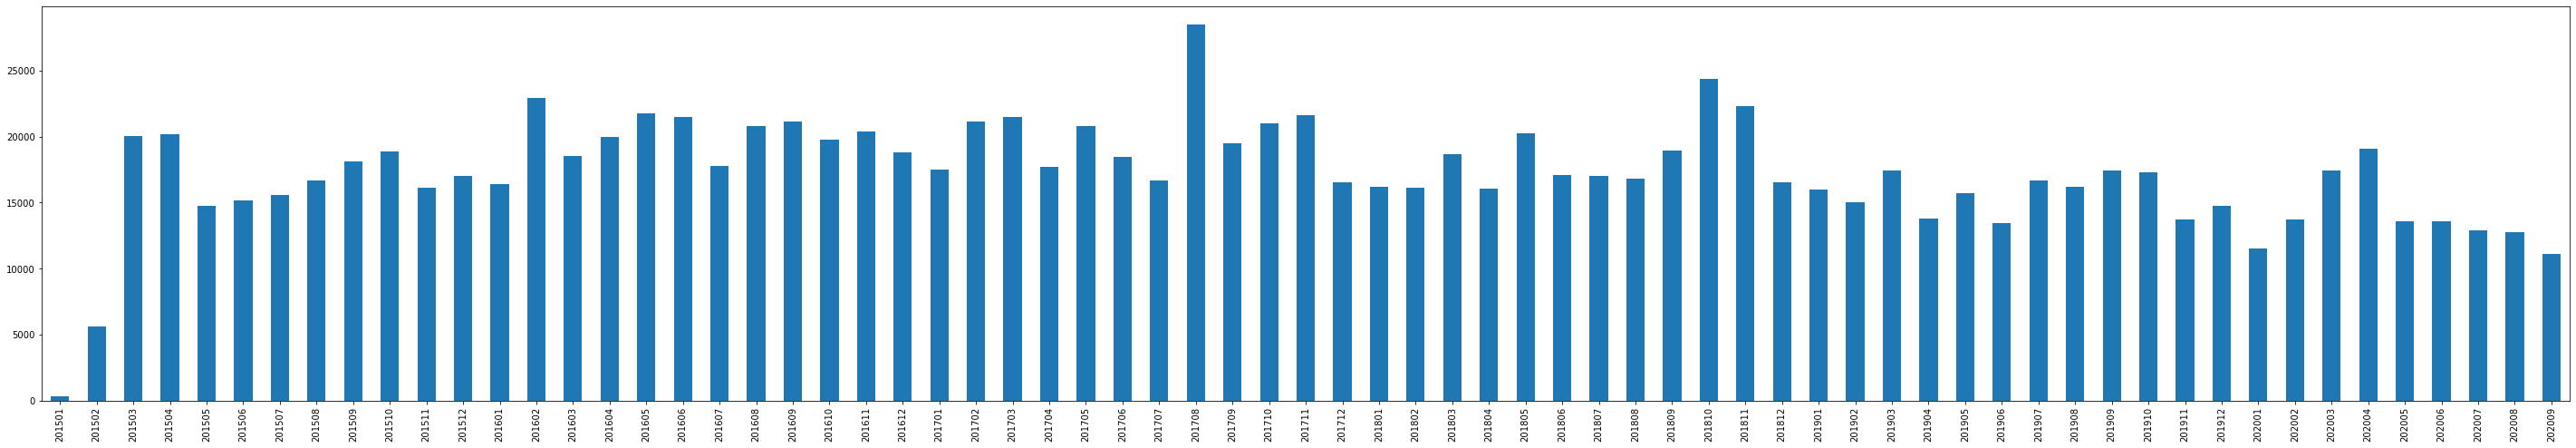

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create out numpy array for visualizations
temp_array = pd.Series(np.array(df2['count']), index = np.array(df2['yearMonth']))

plt.figure(figsize=(50,8))
temp_array.plot.bar()

<AxesSubplot:>

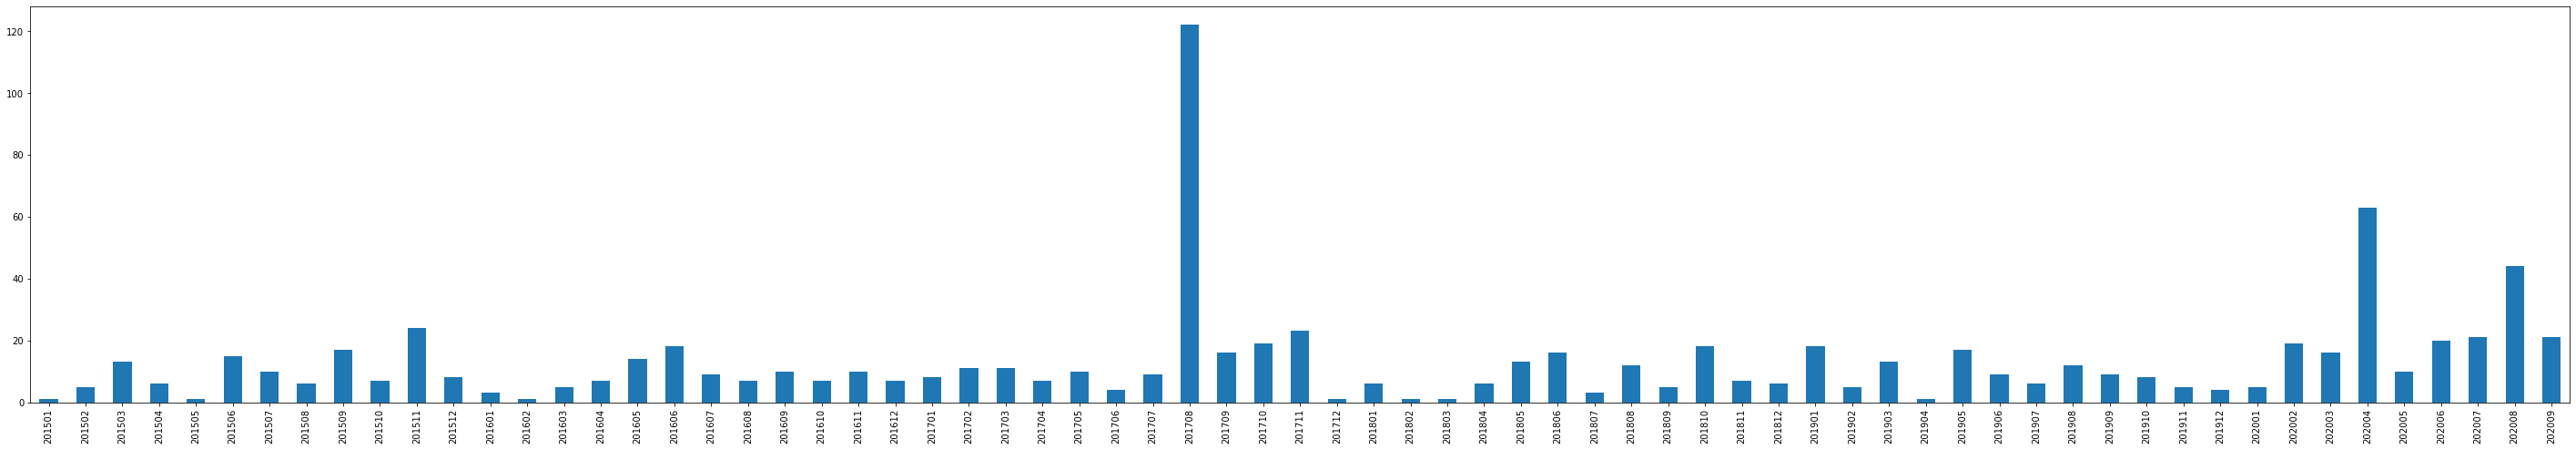

In [51]:
# Count the number of Events each month since 2015, where the ActionLocation is Guam and the Actor1 is China
query = """
SELECT DISTINCT SUBSTR(CAST(dt.date as varchar),1,6) as yearMonth , count(*) as count
FROM 
(SELECT DISTINCT SQLDATE as date
FROM df
WHERE SQLDATE > 20150000) dt left join df on dt.date = df.SQLDATE
WHERE Actor1Geo_FullName like '%China' and ActionGeo_FullName = "Guam"
GROUP BY yearMonth
"""

# Execute the query and save the result
temp_result = engine.execute(query).fetchall()
# Convert result into numpy array
temp1 = np.array(temp_result)
# Convert np array into dataframe
df2 = pd.DataFrame(data=temp1, columns=['yearMonth','count'])
# Convert the datatypes from Object 
df2 = df2.convert_dtypes()
df2['yearMonth'] = df2['yearMonth'].astype(int)
df2['count'] = df2['count'].astype(int)
# Show the result
df2

temp_array = pd.Series(np.array(df2['count']), index = np.array(df2['yearMonth']))

plt.figure(figsize=(50,8))
temp_array.plot.bar()